Group name: Ascending  
Group members: Jeanette, Kunjian, Shirley, Carrie

In [6]:
import pandas as pd
import numpy as np
import os

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
path = r'E:\_UChicago\MACS30122\final-project-ascending\private'
df_county = pd.read_csv(os.path.join(path, 'county_edu_mob.csv'))
# drop if 'Absolute_Upward_Mobility' is missing
df_county = df_county.dropna(subset=['Absolute_Upward_Mobility'])
df_county.head()

,County_FIPS,demographics_ethnicity_White,demographics_ethnicity_Two or more races,demographics_ethnicity_Hispanic,demographics_ethnicity_Black,demographics_ethnicity_Asian or Pacific Islander,demographics_ethnicity_Native American,demographics_ethnicity_Native Hawaiian or Other Pacific Islander,demographics_ethnicity_Unspecified,demographics_gender_Male,demographics_gender_Female,demographics_subgroup_Students from low-income families,demographics_ethnicity_Asian,demographics_subgroup_Students learning English,test_scores_English_overall_school_value,test_scores_English_overall_state_value,test_scores_English_Grade 3_school_value,test_scores_English_Grade 3_state_value,test_scores_English_Grade 4_school_value,test_scores_English_Grade 4_state_value,test_scores_English_Grade 5_school_value,test_scores_English_Grade 5_state_value,test_scores_English_Grade 6_school_value,test_scores_English_Grade 6_state_value,test_scores_Math_overall_school_value,test_scores_Math_overall_state_value,test_scores_Math_Grade 3_school_value,test_scores_Math_Grade 3_state_value,test_scores_Math_Grade 4_school_value,test_scores_Math_Grade 4_state_value,test_scores_Math_Grade 5_school_value,test_scores_Math_Grade 5_state_value,test_scores_Math_Grade 6_school_value,test_scores_Math_Grade 6_state_value,test_scores_Social Studies_overall_school_value,test_scores_Social Studies_overall_state_value,test_scores_Social Studies_Grade 5_school_value,test_scores_Social Studies_Grade 5_state_value,test_scores_Science_overall_school_value,test_scores_Science_overall_state_value,test_scores_Science_Grade 5_school_value,test_scores_Science_Grade 5_state_value,teachers_staff_Students per teacher_school,teachers_staff_Students per teacher_state,teachers_staff_Students per counselor_school,teachers_staff_Students per counselor_state,teachers_staff_% of teachers with 3 or more years experience_school,teachers_staff_% of teachers with 3 or more years experience_state,teachers_staff_% of full time teachers who are certified_school,teachers_staff_% of full time teachers who are certified_state,teachers_staff_Average teacher salary_school,teachers_staff_Average teacher salary_state,teachers_staff_Nurse_school,teachers_staff_Nurse_state,teachers_staff_Psychologist_school,teachers_staff_Psychologist_state,teachers_staff_Social worker_school,teachers_staff_Social worker_state,teachers_staff_Law enforcement officer_school,teachers_staff_Law enforcement officer_state,teachers_staff_Security guard_school,teachers_staff_Security guard_state,college_prep_4-year high school graduation rate_school_value,college_prep_4-year high school graduation rate_state_value,college_prep_AP course participation_school_value,college_prep_AP course participation_state_value,college_prep_Percentage of students enrolled in Dual Enrollment classes grades 9-12_school_value,college_prep_Percentage of students enrolled in Dual Enrollment classes grades 9-12_state_value,college_prep_Percentage of students enrolled in IB grades 9-12_school_value,college_prep_Percentage of students enrolled in IB grades 9-12_state_value,college_prep_SAT/ACT participation rate_school_value,college_prep_SAT/ACT participation rate_state_value,college_success_Graduates who accumulated 24 credits within 2 years_school_value,college_success_Graduates who accumulated 24 credits within 2 years_state_value,college_prep_Average SAT score_school_value,college_prep_Average SAT score_state_value,college_prep_SAT college readiness rate_school_value,college_prep_SAT college readiness rate_state_value,college_success_Graduates pursuing 4-year college or vocational program_school_value,college_success_Graduates pursuing 4-year college or vocational program_state_value,college_success_Graduates pursuing 2-year college or vocational program_school_value,college_success_Graduates pursuing 2-year college or vocational program_state_value,college_success_Graduates pursuing college or vocational program_school_value,college_success_Graduates pur

In [47]:
# data preprocessing for dim reduction
X = df_county.drop(columns=['Absolute_Upward_Mobility', 'CZ_ID']).set_index('County_FIPS')
# drop columns whose data type is object
X = X.select_dtypes(exclude=['object'])
# fill nan with 0
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
X = X.astype('float64')


In [48]:
y = df_county[['Absolute_Upward_Mobility', 'County_FIPS']].set_index('County_FIPS')
y = y.astype('float64')
y.isna().sum()

Absolute_Upward_Mobility    0
dtype: int64

In [49]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

c:\Users\nina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e-01, tolerance: 9.814e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\nina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e-01, tolerance: 9.814e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\nina\ana

9


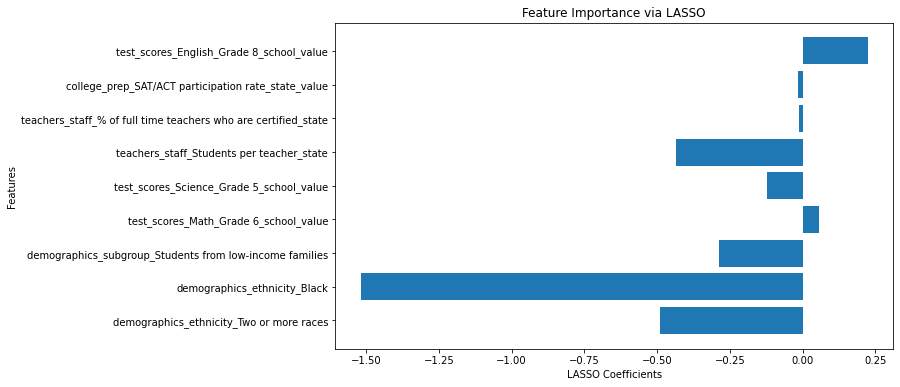

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


lasso = LassoCV(cv=5, random_state=42, n_alphas=100).fit(X_scaled, y)


selected_features = X.columns[lasso.coef_ != 0]
X_selected = X[selected_features]


print(X_selected.shape[1]) 

plt.figure(figsize=(10, 6))
plt.barh(selected_features, lasso.coef_[lasso.coef_ != 0])
plt.xlabel("LASSO Coefficients")
plt.ylabel("Features")
plt.title("Feature Importance via LASSO")
plt.show()

In [ ]:
# Define states and number of commuting zones per state
states = ["Illinois", "Minnesota", "Ohio", "Wisconsin", "Indiana", "Michigan"]
num_zones_per_state = 100
total_zones = len(states) * num_zones_per_state

# data simulation
np.random.seed(42)  # For reproducibility

data = {
    "Commuting_Zone_ID": np.arange(1, total_zones + 1),
    "State": np.repeat(states, num_zones_per_state),
    "Population": np.random.randint(10000, 500000, total_zones),  # Population between 10k and 500k
    "Median_Income": np.random.randint(30000, 100000, total_zones),  # Median income in USD
    "Acreage": np.random.randint(100, 10000, total_zones),  # Acreage between 100 and 10,000 acres
    "Intergen_Mobility": np.random.uniform(0, 1, total_zones),  # Mobility between 0 and 1
    #
    "Teacher_Student_Ratio": np.random.uniform(10, 30, total_zones),  # Ratio between 10 and 30
    "Dropout_Rate": np.random.uniform(0, 20, total_zones),  # Dropout rate between 0% and 20%
    #
    "College_Entrance_Rate": np.random.uniform(50, 100, total_zones),  # College entrance rate between 50% and 100%
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Commuting Zone Data", dataframe=df)


In [6]:
# Adding more complexity with additional relevant columns
df["Unemployment_Rate"] = np.random.uniform(2, 15, total_zones)  # Unemployment rate (2% to 15%)
df["Poverty_Rate"] = np.random.uniform(5, 30, total_zones)  # Poverty rate (5% to 30%)
#
df["High_School_Grad_Rate"] = np.random.uniform(60, 100, total_zones)  # High school graduation rate (60% to 100%)
df["Median_Home_Value"] = np.random.randint(50000, 500000, total_zones)  # Median home value ($50k to $500k)
df["Healthcare_Access_Index"] = np.random.uniform(0, 1, total_zones)  # Healthcare access index (0 to 1)
#
df["Public_School_Ranking"] = np.random.randint(1, 100, total_zones)  # School ranking (1 to 100)
df["Crime_Rate"] = np.random.uniform(0, 50, total_zones)  # Crime rate per 1000 people (0 to 50)
df["Public_Transport_Usage"] = np.random.uniform(0, 50, total_zones)  # Percentage using public transport
df["Internet_Access_Rate"] = np.random.uniform(50, 100, total_zones)  # Percentage of population with internet access
df["Median_Age"] = np.random.uniform(20, 60, total_zones)  # Median age of residents (20 to 60)
#
df["College_Graduation_Rate"] = np.random.uniform(20, 80, total_zones)  # College graduation rate (20% to 80%)
df["Childcare_Affordability_Index"] = np.random.uniform(0, 1, total_zones)  # Affordability index (0 to 1)
df["Environmental_Quality_Index"] = np.random.uniform(0, 1, total_zones)  # Environmental quality index (0 to 1)

# Display the updated dataset
# tools.display_dataframe_to_user(name="Enhanced Commuting Zone Data", dataframe=df)


In [6]:
# Consolidating related variables into grouped categories
df_consolidated = df[[
    "Commuting_Zone_ID", "State",
    
    # Demographic and Economic Indicators
    "Population", "Median_Income", "Median_Home_Value", "Median_Age",
    "Unemployment_Rate", "Poverty_Rate", 
    
    # Education Indicators
    "High_School_Grad_Rate", "College_Graduation_Rate", 
    "Teacher_Student_Ratio", "Dropout_Rate", "College_Entrance_Rate",
    "Public_School_Ranking",
    
    # Mobility and Social Welfare
    "Intergen_Mobility", "Childcare_Affordability_Index", 
    "Healthcare_Access_Index", 
    
    # Infrastructure and Environment
    "Acreage", "Internet_Access_Rate", "Public_Transport_Usage", 
    "Crime_Rate", "Environmental_Quality_Index"
]]

# Display the consolidated dataset
# tools.display_dataframe_to_user(name="Consolidated Commuting Zone Data", dataframe=df_consolidated)

In [7]:
# regressing intergen mobility on various factors
import statsmodels.api as sm

c:\Users\nina\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## step1: Basic Linear Regression

In [53]:
import pandas as pd
import statsmodels.api as sm


# fit the model
model_all = sm.OLS(y, X_selected).fit()

# print the summary
print(model_all.summary())


                                    OLS Regression Results                                   
Dep. Variable:     Absolute_Upward_Mobility   R-squared (uncentered):                   0.979
Model:                                  OLS   Adj. R-squared (uncentered):              0.977
Method:                       Least Squares   F-statistic:                              456.3
Date:                      Wed, 26 Feb 2025   Prob (F-statistic):                    7.72e-70
Time:                              22:46:43   Log-Likelihood:                         -319.89
No. Observations:                        97   AIC:                                      657.8
Df Residuals:                            88   BIC:                                      680.9
Df Model:                                 9                                                  
Covariance Type:                  nonrobust                                                  
                                                            

In [16]:
# education indicators
df_education_full = df_reg_all[[
    "Intergen_Mobility", 
    "High_School_Grad_Rate", "College_Graduation_Rate", "Teacher_Student_Ratio", 
    "Dropout_Rate", "College_Entrance_Rate", "Public_School_Ranking"
]]

# delete rows with missing values
df_education_full = df_education_full.dropna()

# standardize the data
df_education_full.iloc[:, 1:] = scaler.fit_transform(df_education_full.iloc[:, 1:])

# define dependent and independent variables
y_education_full = df_education_full["Intergen_Mobility"]
X_education_full = df_education_full.drop(columns=["Intergen_Mobility"])

# add constant to the independent variables
X_education_full = sm.add_constant(X_education_full)

# OLS regression
model_education_full = sm.OLS(y_education_full, X_education_full).fit()

# print the summary
print(model_education_full.summary())


                            OLS Regression Results                            
Dep. Variable:      Intergen_Mobility   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7119
Date:                Fri, 31 Jan 2025   Prob (F-statistic):              0.640
Time:                        16:15:50   Log-Likelihood:                -86.238
No. Observations:                 600   AIC:                             186.5
Df Residuals:                     593   BIC:                             217.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

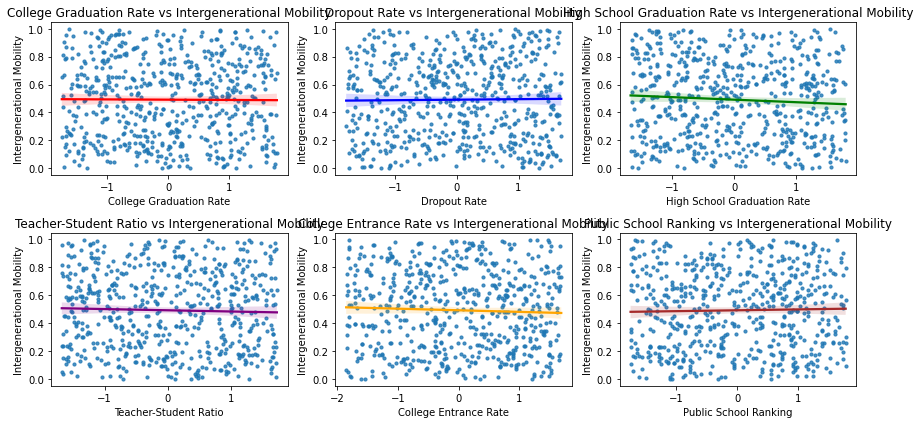

In [21]:
# plot the relationship between College_Graduation_Rate and Intergen_Mobility
plt.figure(figsize=(12, 6))

# plot the relationship between College_Graduation_Rate and Intergen_Mobility
plt.subplot(2, 3, 1)
sns.regplot(x="College_Graduation_Rate", y="Intergen_Mobility", data=df_education_full, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel("College Graduation Rate")
plt.ylabel("Intergenerational Mobility")
plt.title("College Graduation Rate vs Intergenerational Mobility")

# plot the relationship between Dropout_Rate and Intergen_Mobility
plt.subplot(2, 3, 2)
sns.regplot(x="Dropout_Rate", y="Intergen_Mobility", data=df_education_full, scatter_kws={'s':10}, line_kws={'color':'blue'})
plt.xlabel("Dropout Rate")
plt.ylabel("Intergenerational Mobility")
plt.title("Dropout Rate vs Intergenerational Mobility")

# plot the relationship between high school graduation rate and intergenerational mobility
plt.subplot(2, 3, 3)
sns.regplot(x="High_School_Grad_Rate", y="Intergen_Mobility", data=df_education_full, scatter_kws={'s':10}, line_kws={'color':'green'})
plt.xlabel("High School Graduation Rate")
plt.ylabel("Intergenerational Mobility")
plt.title("High School Graduation Rate vs Intergenerational Mobility")

# plot the relationship between teacher-student ratio and intergenerational mobility
plt.subplot(2, 3, 4)
sns.regplot(x="Teacher_Student_Ratio", y="Intergen_Mobility", data=df_education_full, scatter_kws={'s':10}, line_kws={'color':'purple'})
plt.xlabel("Teacher-Student Ratio")
plt.ylabel("Intergenerational Mobility")
plt.title("Teacher-Student Ratio vs Intergenerational Mobility")

# plot the relationship between college entrance rate and intergenerational mobility
plt.subplot(2, 3, 5)
sns.regplot(x="College_Entrance_Rate", y="Intergen_Mobility", data=df_education_full, scatter_kws={'s':10}, line_kws={'color':'orange'})
plt.xlabel("College Entrance Rate")
plt.ylabel("Intergenerational Mobility")
plt.title("College Entrance Rate vs Intergenerational Mobility")

# plot the relationship between public school ranking and intergenerational mobility
plt.subplot(2, 3, 6)
sns.regplot(x="Public_School_Ranking", y="Intergen_Mobility", data=df_education_full, scatter_kws={'s':10}, line_kws={'color':'brown'})
plt.xlabel("Public School Ranking")
plt.ylabel("Intergenerational Mobility")
plt.title("Public School Ranking vs Intergenerational Mobility")

# adjust the layout
plt.tight_layout()
plt.show()


#### 1*: Regression with interaction terms

In [22]:
# OLS regression with interaction terms
df_reg["College_Grad_Poverty_Interaction"] = df_reg["College_Graduation_Rate"] * df_reg["Poverty_Rate"]

# define the dependent and independent variables
X_interact = df_reg[[
    "College_Graduation_Rate", "Poverty_Rate", "College_Grad_Poverty_Interaction",
    "High_School_Grad_Rate", "Dropout_Rate", "Median_Income", "Unemployment_Rate"
]]

# add a constant to the independent variables
X_interact = sm.add_constant(X_interact)

# fit the model
model_interact = sm.OLS(y, X_interact).fit()

# print the model summary
print(model_interact.summary())


                            OLS Regression Results                            
Dep. Variable:      Intergen_Mobility   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7558
Date:                Fri, 31 Jan 2025   Prob (F-statistic):              0.625
Time:                        16:23:46   Log-Likelihood:                -85.722
No. Observations:                 600   AIC:                             187.4
Df Residuals:                     592   BIC:                             222.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

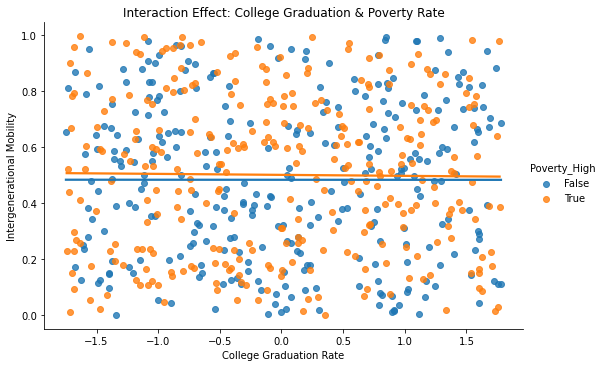

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# add a new column to the DataFrame based on median poverty rate
median_poverty = df_reg["Poverty_Rate"].median()
df_reg["Poverty_High"] = df_reg["Poverty_Rate"] > median_poverty

# plot the interaction effect
sns.lmplot(
    x="College_Graduation_Rate", y="Intergen_Mobility", hue="Poverty_High",
    data=df_reg, ci=None, aspect=1.5
)
plt.xlabel("College Graduation Rate")
plt.ylabel("Intergenerational Mobility")
plt.title("Interaction Effect: College Graduation & Poverty Rate")
plt.show()


### Step2. Random Forest Regression

In [ ]:
# contriburion of various factors to intergen mobility
# way to understand the relationship between intergen mobility and other factors
# try to show that education is a key factor in intergen mobility

In [54]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# train test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# fit the random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# predict the target variable
y_pred = rf_regressor.predict(X_test)

# calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 8.634984800000007
R^2 Score: 0.31138092491234337


C:\Users\nina\AppData\Local\Temp\ipykernel_19736\3886006985.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


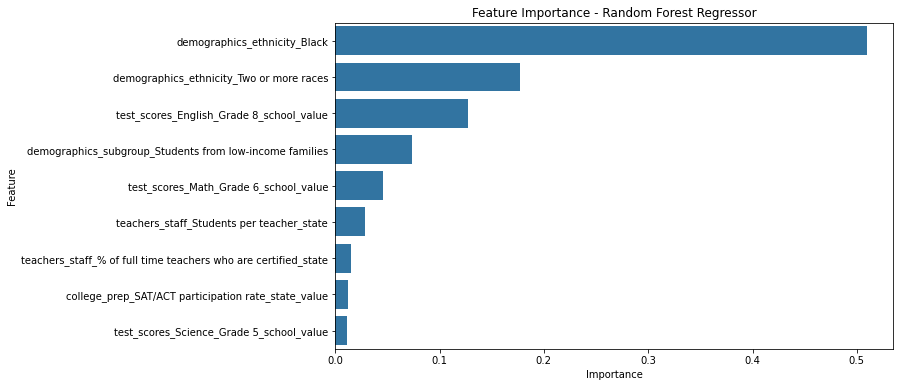

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# feature importances
feature_importances = rf_regressor.feature_importances_

# create a DataFrame to store the feature importances
importance_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
})

# sort the DataFrame in descending order of feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest Regressor")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [58]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# fit the decision tree regressor
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X_train, y_train)

y_pred_train = tree_regressor.predict(X_train)
residuals_train = y_train - y_pred_train
sigma = np.std(residuals_train)

# plot the residuals
fig, ax = plt.subplots(figsize=(10, 6))

residuals_sorted = np.sort(residuals_train)
p = np.arange(1, len(residuals_sorted) + 1) / len(residuals_sorted)
ax.step(residuals_sorted, p, where='post', label='Residuals CDF')

# plot the standard normal distribution
x = np.linspace(-3*sigma, 3*sigma, 100)
ax.plot(x, norm.cdf(x/sigma), 'r-', lw=5, alpha=0.6, label='Norm CDF')

ax.set_title("Residuals CDF with Standard Normal Distribution CDF")
ax.set_xlabel("Residuals")
ax.set_ylabel("Cumulative Frequency")
ax.legend()
ax.grid(True)

plt.show()



ValueError: Unable to coerce to Series, length must be 1: given 77